In [1]:
import time
start_time=time.time()
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord, EarthLocation
from astropy import units as u
from astropy.time import Time
import pickle
import itertools
import statsmodels.api as sm
from scipy import interpolate

from sabreMod import sosf,sosfn
plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="12"


ISIS red arm

In [2]:
Red=dict()
Red[0]='Obs\ISIS.595.Red.txt'
DataR=pd.read_table(Red[0])
DataR=DataR.rename(columns={"Center":"Center.0","ErrC":"ErrC.0","Width":"Width.0","ErrW":"ErrW.0","Peak":"Peak.0","ErrP":"ErrP.0","Line":"Line.0","ErrL":"ErrL.0"})
DataR

,Pos,X,Y,Slit,Archivo,Center.0,ErrC.0,Width.0,ErrW.0,Peak.0,...,Line.3,ErrL.3,Center.4,ErrC.4,Width.4,ErrW.4,Peak.4,ErrP.4,Line.4,ErrL.4
0,1.0,199.809,22.0,1.0,595r1_878-001004.xlsx,6562.267,0.211,-4.288,0.464,-31.70,...,8.525,7.594,6726.756,0.296,1.419,0.544,13.700,5.127,20.690,7.479
1,2.0,198.468,22.0,1.0,595r1_878-005008.xlsx,6557.690,0.228,0.882,0.404,16.36,...,18.900,6.029,6725.364,0.150,0.913,0.297,-1.937,4.781,-1.883,-4.577
2,3.0,197.127,22.0,1.0,595r1_878-009012.xlsx,6557.705,0.108,0.970,0.262,35.66,...,7.970,9.081,6724.843,0.551,2.664,1.016,8.852,3.333,25.110,9.367
3,4.0,195.786,22.0,1.0,595r1_878-013016.xlsx,6557.593,0.083,0.916,0.202,41.62,...,17.990,8.705,6725.727,0.605,2.698,1.057,3.842,2.687,11.030,8.172
4,5.0,194.445,22.0,1.0,595r1_878-017020.xlsx,6557.546,0.082,0.813,0.195,40.74,...,-14.250,-5.156,6724.045,0.154,0.948,0.355,-8.792,4.558,-8.870,-5.081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1498,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
i=3#[SII]6717
Dt1=[DataR.X, DataR.Y,DataR["Center."+str(i)],DataR["ErrC."+str(i)],DataR["Width."+str(i)],DataR["ErrW."+str(i)],DataR["Peak."+str(i)],DataR["ErrP."+str(i)],DataR["Line."+str(i)],DataR["ErrL."+str(i)]]
Dt1=pd.DataFrame(Dt1).T
Dt1.describe()

,X,Y,Center.3,ErrC.3,Width.3,ErrW.3,Peak.3,ErrP.3,Line.3,ErrL.3
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1.350000e+03,1350.000000,1350.00000,1350.000000
mean,99.904500,10.568889,6701.934287,0.282159,0.570914,0.648507,5.610345e+03,12.771756,-460.85260,-193.664979
std,58.087231,6.978156,258.247768,1.162891,10.332805,5.182002,2.042861e+05,154.678307,18152.38034,7186.856371
min,0.000000,0.000000,0.000000,0.000000,-209.900000,0.000000,-9.376000e+02,0.000000,-666900.00000,-264000.000000
25%,49.617000,5.000000,6711.548000,0.047000,0.765250,0.111000,1.247000e+01,4.051500,15.28750,4.472250
50%,99.904500,11.000000,6711.810500,0.086000,0.935000,0.201000,2.320500e+01,4.907500,25.50500,5.203000
75%,150.192000,15.000000,6712.047750,0.174500,1.306500,0.384000,4.213250e+01,5.661750,41.49000,6.261000
max,199.809000,22.000000,6721.883000,23.790000,12.756000,163.920000,7.506000e+06,4392.000000,1389.00000,1128.000000


In [4]:
i=4#[SII]6731
Dt2=[DataR.X, DataR.Y,DataR["Center."+str(i)],DataR["ErrC."+str(i)],DataR["Width."+str(i)],DataR["ErrW."+str(i)],DataR["Peak."+str(i)],DataR["ErrP."+str(i)],DataR["Line."+str(i)],DataR["ErrL."+str(i)]]
Dt2=pd.DataFrame(Dt2).T
Dt2.describe()

,X,Y,Center.4,ErrC.4,Width.4,ErrW.4,Peak.4,ErrP.4,Line.4,ErrL.4
count,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.00000,1350.000000,1350.000000,1350.000000
mean,99.904500,10.568889,6716.312856,0.282159,0.570914,0.648507,32.59146,6.970757,25.096572,0.685493
std,58.087231,6.978156,258.801808,1.162891,10.332805,5.182002,100.87578,40.909137,179.412127,111.059228
min,0.000000,0.000000,0.000000,0.000000,-209.900000,0.000000,-226.90000,0.000000,-3044.000000,-3764.000000
25%,49.617000,5.000000,6725.948000,0.047000,0.765250,0.111000,6.21300,3.699250,8.240750,3.967500
50%,99.904500,11.000000,6726.210000,0.086000,0.935000,0.201000,14.43000,4.615500,16.110000,4.680500
75%,150.192000,15.000000,6726.447750,0.174500,1.306500,0.384000,27.48000,5.358750,28.577500,5.707250
max,199.809000,22.000000,6736.283000,23.790000,12.756000,163.920000,2155.00000,1081.000000,5071.000000,299.900000


[SII]6717

Peak

In [5]:
#data_P=(Dt1.round(2)).pivot(index='Y', columns='X', values='Peak.3')#TableFormat

sz=2
wd=DataR.X.max()-DataR.X.min()
hd=DataR.Y.max()-DataR.Y.min()
ar=wd/hd

#fig, ax = plt.subplots(figsize=(sz*ar,sz))
#sns.heatmap(data_P, cmap="inferno")
#plt.gca().invert_yaxis()
#plt.axis('equal')

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


(-9.990450000000003, 209.79945000000004, -1.1, 23.1)

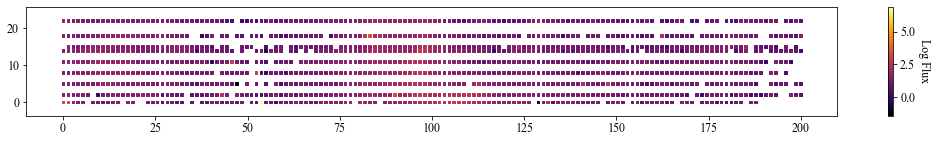

In [6]:
fig, ax = plt.subplots(figsize=(sz*ar,sz))

plt.scatter(Dt1.X,Dt1.Y,c=np.log10(Dt1['Peak.3']), s=8,marker='s',cmap="inferno")
cbar = plt.colorbar()
cbar.set_label('Log Flux', rotation=270, labelpad=15)  
plt.axis('equal')

(0.0, 30.0, 0.0, 9.0)

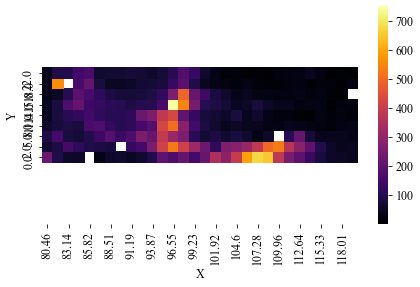

In [7]:
mP1=(Dt1.X>80)&(Dt1.X<120)&(Dt1["Peak.3"]>0)&(Dt1["Peak.3"]<2000)
data_P1=(Dt1[mP1].round(2)).pivot(index='Y', columns='X', values='Peak.3')#TableFormat

sz=4
wd=Dt1[mP1].X.max()-Dt1[mP1].X.min()
hd=Dt1[mP1].Y.max()-Dt1[mP1].Y.min()
ar=wd/hd

fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_P1, cmap="inferno")
plt.gca().invert_yaxis()
plt.axis('equal')

Heliocentric Radial velocity 

In [8]:
l=[6716.5]#AngstromsR

c=299792.459#km/s

RA=23.638292#J2000
Dec=30.784889#J200

orm = EarthLocation.of_site('Roque de los Muchachos')
sc = SkyCoord(ra=RA*u.deg, dec=Dec*u.deg)
heliocorr = sc.radial_velocity_correction('heliocentric', obstime=Time('1992-8-18'), location=orm) 
heliocorr.to(u.km/u.s) 
corrhelio=np.array(heliocorr.to(u.km/u.s))

RVo=c*(Dt1["Center.3"]-l)/l
RV=RVo+corrhelio

Dt1=Dt1.assign(RV=RV.values)

(0.0, 30.0, 0.0, 9.0)

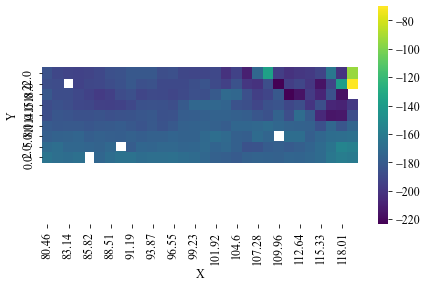

In [9]:
data_VR=(Dt1[mP1].round(2)).pivot(index='Y', columns='X', values='RV')#TableFormat
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_VR, cmap="viridis")
plt.gca().invert_yaxis()
plt.axis('equal')

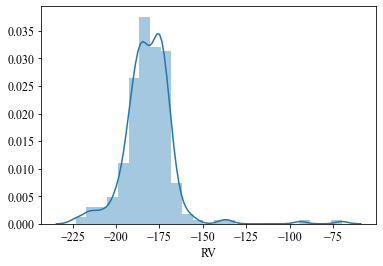

In [10]:
sns.distplot(Dt1.RV[mP1],bins=25)

In [11]:
Dt1I=Dt1[mP1]
mR1=(Dt1I.RV>-195)&(Dt1I.RV<-165)

(0.0, 30.0, 0.0, 9.0)

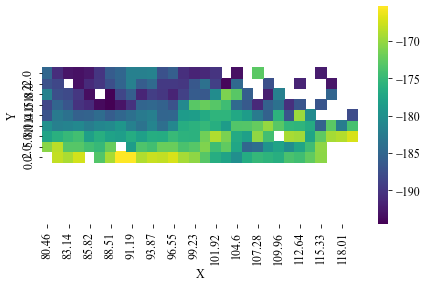

In [12]:
data_VR=(Dt1I[mR1].round(2)).pivot(index='Y', columns='X', values='RV')#TableFormat
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_VR, cmap="viridis")
plt.gca().invert_yaxis()
plt.axis('equal')

Sigma

In [13]:
T=8350#K Table 5

Xw=32.065#
SI=15#km/s

#SigmaObs
a=0.6006/1.414
SigmaObs=a*(Dt1I["Width.3"]/l)*c
    
#SigmaTerm
b=166.6/1.414
SigmaTerm=np.sqrt(b*(T/10000)/Xw)

SigmaDisp=np.sqrt(SigmaObs**2-SigmaTerm**2-SI**2)

Dt1I=Dt1I.assign(Sig=SigmaDisp.values)

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


(0.0, 30.0, 0.0, 9.0)

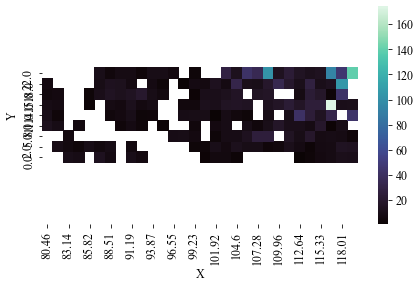

In [14]:
data_SR=(Dt1I.round(2)).pivot(index='Y', columns='X', values='Sig')#TableFormat
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_SR, cmap="mako")
plt.gca().invert_yaxis()
plt.axis('equal')

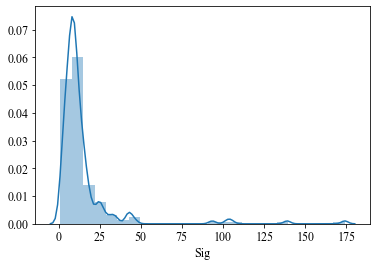

In [15]:
sns.distplot(Dt1I.Sig,bins=25)

In [16]:
Dt1II=Dt1I[mR1]
mS1=Dt1II.Sig<60

(0.0, 30.0, 0.0, 9.0)

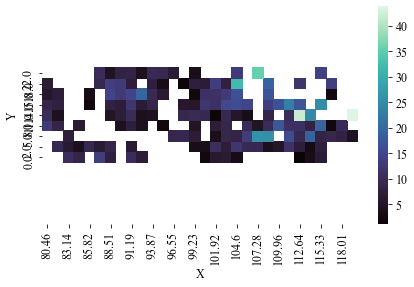

In [17]:
data_S1=(Dt1II[mS1].round(2)).pivot(index='Y', columns='X', values='Sig')#TableFormat
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_S1, cmap="mako")
plt.gca().invert_yaxis()
plt.axis('equal')

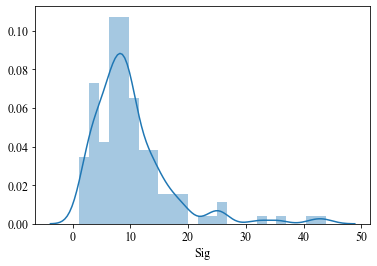

In [18]:
sns.distplot(Dt1II[mS1].Sig,bins=25)

[SII]6731

Peak

In [19]:
#data_P2=(Dt2.round(2)).pivot(index='Y', columns='X', values='Peak.4')#TableFormat

sz=2
wd=DataR.X.max()-DataR.X.min()
hd=DataR.Y.max()-DataR.Y.min()
ar=wd/hd

#fig, ax = plt.subplots(figsize=(sz*ar,sz))
#sns.heatmap(data_P2, cmap="inferno")
#plt.gca().invert_yaxis()
#plt.axis('equal')

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


(-9.990450000000003, 209.79945000000004, -1.1, 23.1)

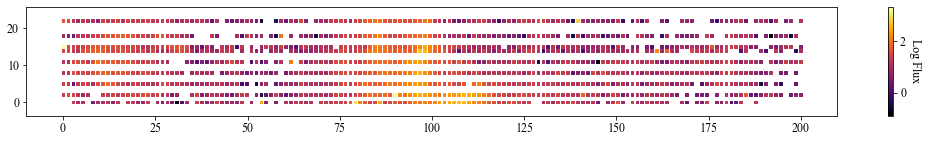

In [20]:
fig, ax = plt.subplots(figsize=(sz*ar,sz))

plt.scatter(Dt2.X,Dt2.Y,c=np.log10(Dt2['Peak.4']), s=8,marker='s',cmap="inferno")
cbar = plt.colorbar()
cbar.set_label('Log Flux', rotation=270, labelpad=15)  
plt.axis('equal')

(0.0, 30.0, 0.0, 9.0)

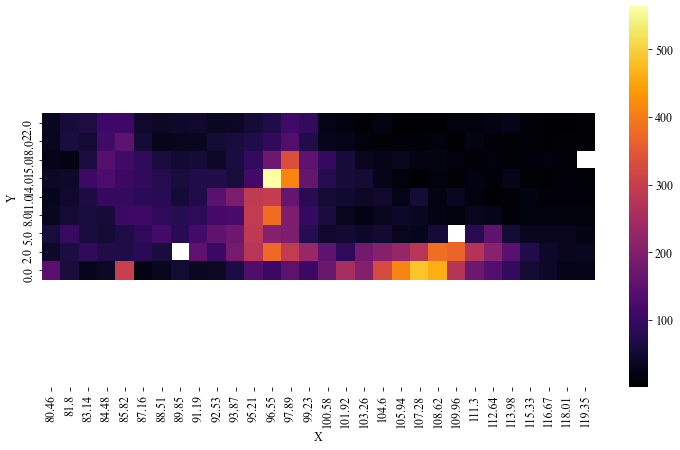

In [21]:
mP2=(Dt2.X>80)&(Dt2.X<120)&(Dt2["Peak.4"]>0)&(Dt2["Peak.4"]<1750)
data_P2=(Dt2[mP2].round(2)).pivot(index='Y', columns='X', values='Peak.4')#TableFormat

sz=7
wd=Dt2[mP2].X.max()-Dt2[mP2].X.min()
hd=Dt2[mP2].Y.max()-Dt2[mP2].Y.min()
ar=wd/hd

fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_P2, cmap="inferno")
plt.gca().invert_yaxis()
plt.axis('equal')

In [22]:
l=[6730.8]#AngstromsR

c=299792.459#km/s

RA=23.638292#J2000
Dec=30.784889#J200

orm = EarthLocation.of_site('Roque de los Muchachos')
sc = SkyCoord(ra=RA*u.deg, dec=Dec*u.deg)
heliocorr = sc.radial_velocity_correction('heliocentric', obstime=Time('1992-8-18'), location=orm) 
heliocorr.to(u.km/u.s) 
corrhelio=np.array(heliocorr.to(u.km/u.s))

RVo=c*(Dt2["Center.4"]-l)/l
RV=RVo+corrhelio

Dt2=Dt2.assign(RV=RV.values)

(0.0, 30.0, 0.0, 9.0)

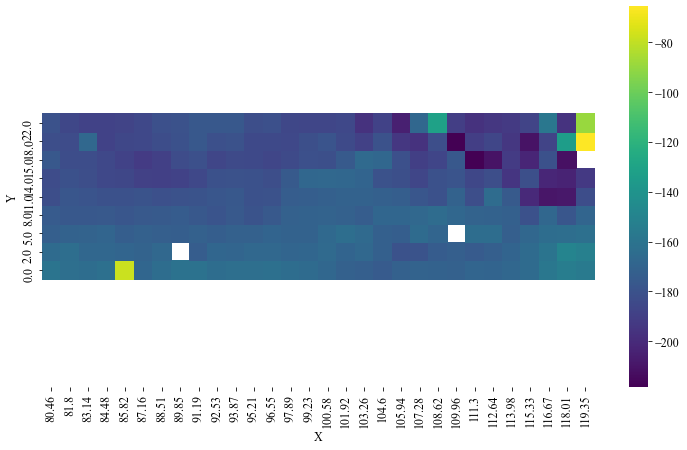

In [23]:
data_VB=(Dt2[mP2].round(2)).pivot(index='Y', columns='X', values='RV')#TableFormat
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_VB, cmap="viridis")
plt.gca().invert_yaxis()
plt.axis('equal')

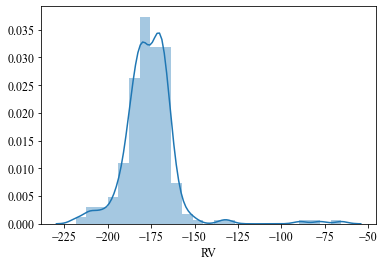

In [24]:
sns.distplot(Dt2[mP2].RV,bins=25)

In [25]:
Dt2I=Dt2[mP2]
mR2=(Dt2I.RV>-190)&(Dt2I.RV<-160)

(0.0, 30.0, 0.0, 9.0)

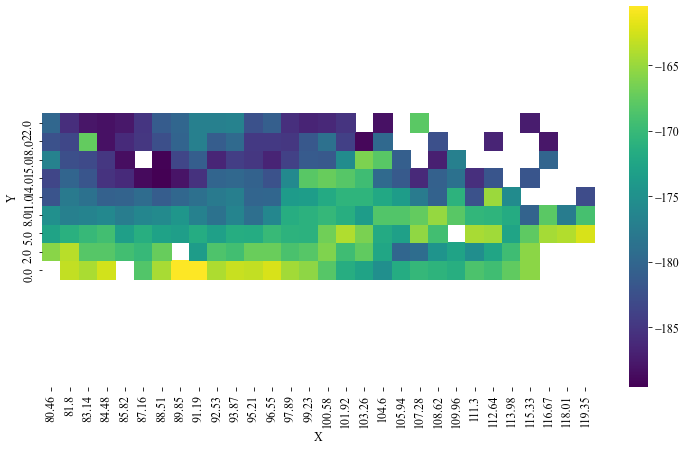

In [26]:
data_VB=(Dt2I[mR2].round(2)).pivot(index='Y', columns='X', values='RV')#TableFormat
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_VB, cmap="viridis")
plt.gca().invert_yaxis()
plt.axis('equal')

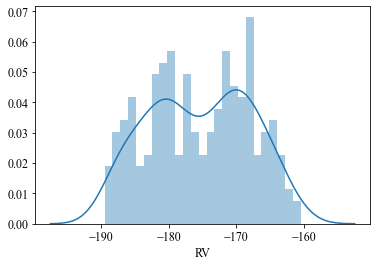

In [27]:
sns.distplot(Dt2I[mR2].RV,bins=25)

In [28]:
T=8350#K Table 5

Xw=32.065#
SI=15#km/s

#SigmaObs
a=0.6006/1.414
SigmaObs=a*(Dt2I["Width.4"]/l)*c
    
#SigmaTerm
b=166.6/1.414
SigmaTerm=np.sqrt(b*(T/10000)/Xw)

SigmaDisp=np.sqrt(SigmaObs**2-SigmaTerm**2-SI**2)

Dt2I=Dt2I.assign(Sig=SigmaDisp.values)

C:\Users\ZAINTEL2\anaconda3\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


(0.0, 30.0, 0.0, 9.0)

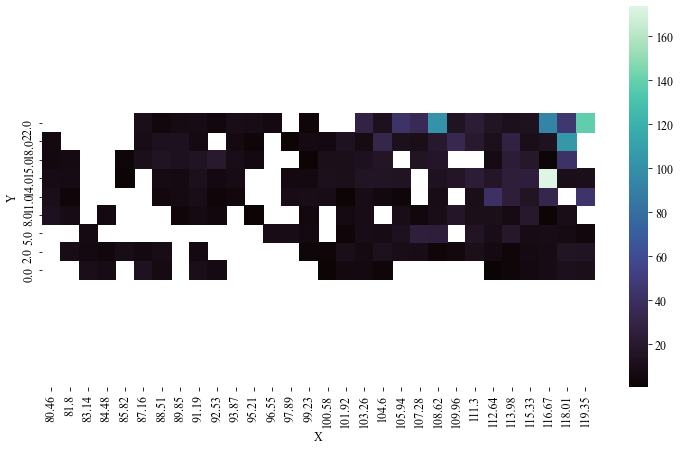

In [29]:
data_SB=(Dt2I.round(2)).pivot(index='Y', columns='X', values='Sig')#TableFormat
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_SB, cmap="mako")
plt.gca().invert_yaxis()
plt.axis('equal')

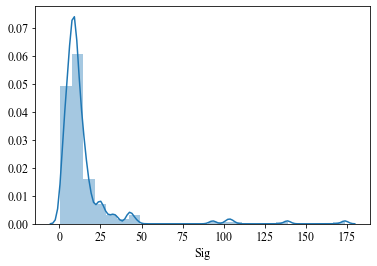

In [30]:
sns.distplot(Dt2I.Sig,bins=25)

In [31]:
Dt2II=Dt2I[mR2]
mS2=((Dt2II["Sig"]<60))

(0.0, 30.0, 0.0, 9.0)

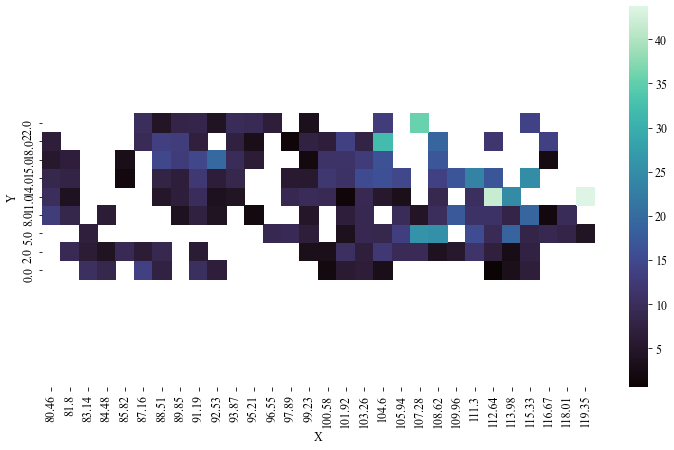

In [32]:
data_SB=(Dt2II[mS2].round(2)).pivot(index='Y', columns='X', values='Sig')#TableFormat
fig, ax = plt.subplots(figsize=(sz*ar,sz))
sns.heatmap(data_SB, cmap="mako")
plt.gca().invert_yaxis()
plt.axis('equal')

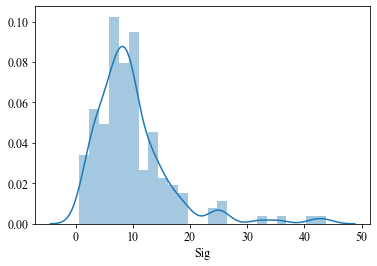

In [33]:
sns.distplot(Dt2II[mS2].Sig,bins=25)

Comparison

In [34]:
Dt1c=Dt1II[mS1]
Dt2c=Dt2II[mS2]

Peak

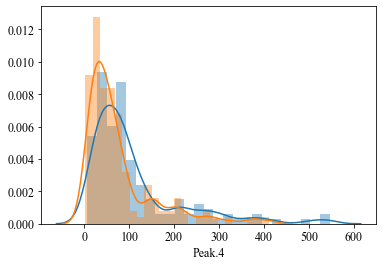

In [35]:
sns.distplot(Dt1c["Peak.3"],bins=25)
sns.distplot(Dt2c["Peak.4"],bins=25)

Normalize emission

In [36]:
PeakN=Dt1c["Peak.3"]/Dt1c["Peak.3"].max()
Dt1c=Dt1c.assign(PeakN=PeakN.values)

In [37]:
PeakN=Dt2c["Peak.4"]/Dt2c["Peak.4"].max()
Dt2c=Dt2c.assign(PeakN=PeakN.values)

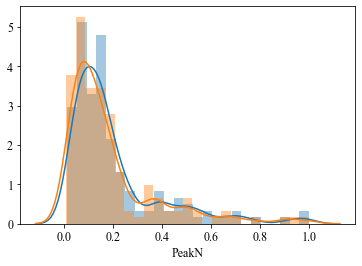

In [38]:
sns.distplot(Dt1c["PeakN"],bins=25)
sns.distplot(Dt2c["PeakN"],bins=25)

Radial Velocity

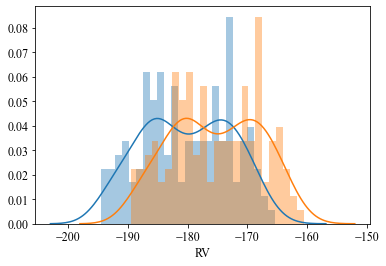

In [39]:
sns.distplot(Dt1c.RV,bins=25)
sns.distplot(Dt2c.RV,bins=25)

Sigma

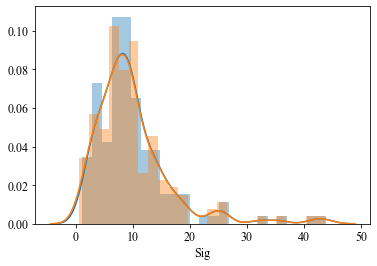

In [40]:
sns.distplot(Dt1c.Sig,bins=25)
sns.distplot(Dt2c.Sig,bins=25)

Structure Function

In [41]:
pc=4.16

1.0


[None, None]

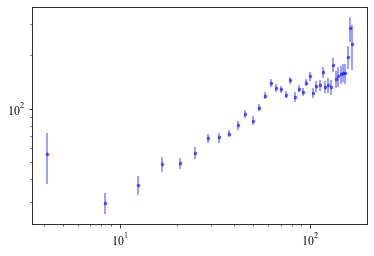

In [42]:
SF=sosf(Dt1c)
SF.Lag=SF.Lag*pc

fig,ax=plt.subplots()

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.5, markersize=5)

ax.set(xscale='log',yscale='log')

In [43]:
x=SF['Lag']
y=SF['Nmqvd']-(Dt1c["RV"].std())**2
tck=interpolate.splrep(x,y,s=0)
grid=np.linspace(x.min(),x.max(),num=len(x))
ynew=interpolate.splev(grid,tck,der=0)
inter=pd.DataFrame([grid,ynew]).T
SFr=interpolate.sproot(tck)
SFr

array([ 4.2709519, 24.1382248])

In [44]:
s=SFr[1]

In [45]:
ss=np.round((Dt1c["RV"].std())**2,2)

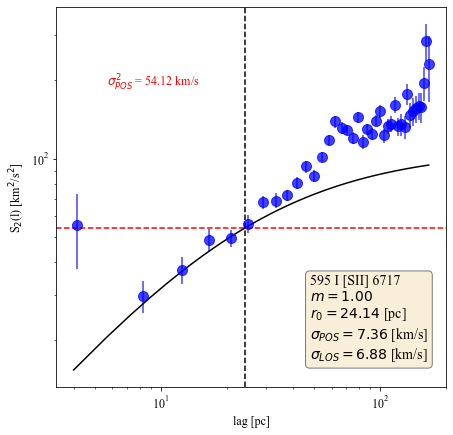

In [46]:
fig,ax=plt.subplots(figsize=(7,7))

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.75, markersize=20)

ax.set(xlabel='lag [pc]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]')

plt.axhline(y=ss, color='r', linestyle='--')
ax.text(0.25, 0.8,'$σ_{POS}^{2}$ = '+str(ss)+' km/s', ha='center', va='center', transform=ax.transAxes, color='r')


plt.axvline(x=s, color='k', linestyle='--')

lo=s

n=1

x=np.linspace(int(SF.Lag.min()),int(SF.Lag.max()),100)
c=1/(1+(x/lo)**n)

y=2*(1-c)*ss

plt.loglog(x,y,color='k', linestyle='-')


textstr = '\n'.join(('595 I [SII] 6717' ,r'$m=%.2f$'%n, r'$r_{0}=%.2f$' % s+' [pc]',
                     r'$σ_{POS}=%.2f$' % (Dt1c["RV"].std()) + ' [km/s]' , r'$σ_{LOS}=%.2f$'%(Dt1c["Sig"].std()) + ' [km/s]' )) 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.65, .3, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="20"

#ax.set_xlim(1, 250)
#ax.set_ylim(1, 750)

#fig.savefig('Img//'+samples[0][i]+'.pdf')

In [47]:
SF1=SF

1.0


[None, None]

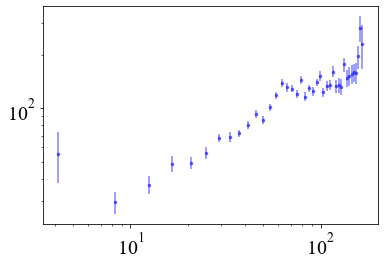

In [48]:
SF=sosf(Dt2c)
SF.Lag=SF.Lag*pc

fig,ax=plt.subplots()

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.5, markersize=5)

ax.set(xscale='log',yscale='log')

In [49]:
x=SF['Lag']
y=SF['Nmqvd']-(Dt2c["RV"].std())**2
tck=interpolate.splrep(x,y,s=0)
grid=np.linspace(x.min(),x.max(),num=len(x))
ynew=interpolate.splev(grid,tck,der=0)
inter=pd.DataFrame([grid,ynew]).T
SFr=interpolate.sproot(tck)
SFr

array([ 4.2775621 , 24.14372662])

In [50]:
s=SFr[1]

In [51]:
ss=np.round((Dt2c["RV"].std())**2,2)

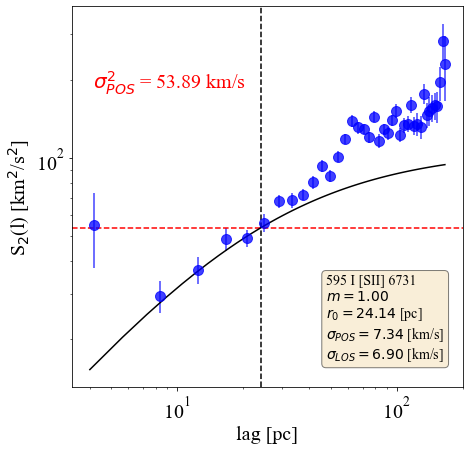

In [52]:
fig,ax=plt.subplots(figsize=(7,7))

ax.errorbar(SF.Lag,SF.Nmqvd, yerr=SF.ErrY, marker='.', fmt=' ',color="blue", ecolor="blue",
                     alpha=0.75, markersize=20)

ax.set(xlabel='lag [pc]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]')

plt.axhline(y=ss, color='r', linestyle='--')
ax.text(0.25, 0.8,'$σ_{POS}^{2}$ = '+str(ss)+' km/s', ha='center', va='center', transform=ax.transAxes, color='r')


plt.axvline(x=s, color='k', linestyle='--')

lo=s

n=1

x=np.linspace(int(SF.Lag.min()),int(SF.Lag.max()),100)
c=1/(1+(x/lo)**n)

y=2*(1-c)*ss

plt.loglog(x,y,color='k', linestyle='-')


textstr = '\n'.join(('595 I [SII] 6731' ,r'$m=%.2f$'%n, r'$r_{0}=%.2f$' % s+' [pc]',
                     r'$σ_{POS}=%.2f$' % (Dt2c["RV"].std()) + ' [km/s]' , r'$σ_{LOS}=%.2f$'%(Dt2c["Sig"].std()) + ' [km/s]' )) 

props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.65, .3, textstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

plt.rcParams["font.family"]="Times New Roman"
plt.rcParams["font.size"]="20"

#ax.set_xlim(1, 250)
#ax.set_ylim(1, 750)

#fig.savefig('Img//'+samples[0][i]+'.pdf')

In [53]:
SF2=SF

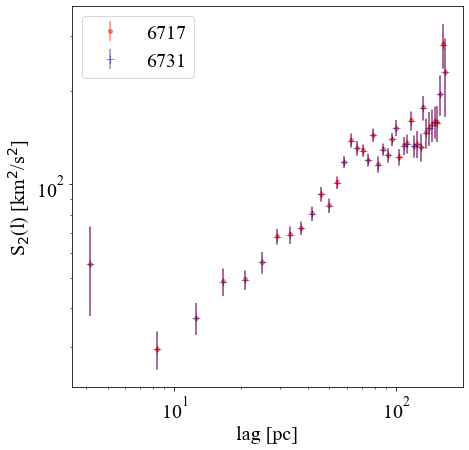

In [54]:
fig,ax=plt.subplots(figsize=(7,7))

ax.errorbar(SF1.Lag,SF1.Nmqvd, yerr=SF1.ErrY, marker='.', fmt=' ',color="red", ecolor="red",
                     alpha=0.45, markersize=8,label='6717')

ax.errorbar(SF2.Lag,SF2.Nmqvd, yerr=SF2.ErrY, marker='+', fmt=' ',color="navy", ecolor="navy",
                     alpha=0.45, markersize=8,label='6731')

plt.yscale('log')
plt.xscale('log')
ax.set(xlabel='lag [pc]', ylabel='S$_{2}$(l) [km$^{2}$/s$^{2}$]')
plt.legend()

[Text(0, 0.5, '$σ$ [km/s]'), Text(0.5, 0, 'I')]

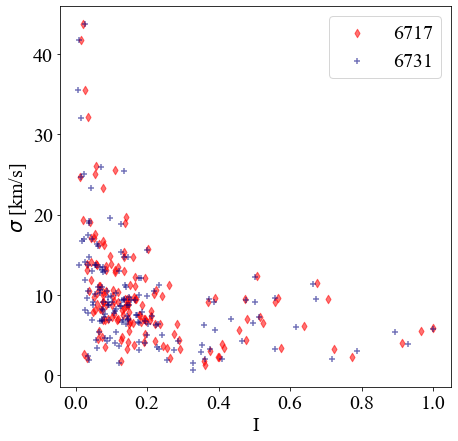

In [55]:
fig,ax=plt.subplots(figsize=(7,7))

plt.scatter(Dt1c["Peak.3"]/Dt1c["Peak.3"].max(),Dt1c["Sig"],alpha=0.55,marker='d',color="red",label='6717')
plt.scatter(Dt2c["Peak.4"]/Dt2c["Peak.4"].max(),Dt2c["Sig"],alpha=0.55,marker='+',color="navy",label='6731')
plt.legend()
ax.set(xlabel='I', ylabel='$σ$ [km/s]')

In [56]:
print("--- %s seconds ---" % (time.time()-start_time))

--- 16.201050758361816 seconds ---
